In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.cluster import hierarchy #import dendrogram
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from scipy.stats import chi2_contingency
import seaborn

In [2]:
with open('../data/final_clustering.pkl', 'rb') as f:
    cdat = pickle.load(f)

b = cdat['basis']
m = cdat['metabric']
measure_cols = cdat['measure_cols']
measure_col_titles = cdat['measure_names']
cluster_names = cdat['cluster_names']
cluster_colors = {i + 1: c for i, c in enumerate(cdat['cluster_colors'])}
cluster_col = 'clusters'
## make ICGC node status binary
b['node'] = b['number_of_positive_lymph_nodes'].apply(lambda x: 'positive' if str(x) == '0' else (np.nan if pd.isna(x) else 'negative'))

In [6]:
b_variables = ['final.ER_x', 'grade', 'node', 'final.HER2']
m_variables = ['er_status', 'grade', 'node', 'HER2']
variables_titles = ['ER', 'Grade', 'Lymphnode', 'HER2']
b_ylims = [[0, 6.5], [0, 2], [0, 4.5], [0, 1.], [0, 1.], [0, 1.]]
m_ylims = [[0, 4.5], [0, 10], [0, 10], [0, 1.], [0, 1.], [0, 1.]]

In [7]:
def boxplot_variable(fig, outer, cohort, variable, variable_title, ylims, all_first_row=True, col_titles=True, row_titles=True):
    valid_groups = sorted(set(cohort[variable][~cohort[variable].isna()]))
    plot_rows = len(valid_groups) + (1 if all_first_row else 0)
    plot_cols = len(measure_cols)
    #
    inner = gridspec.GridSpecFromSubplotSpec(plot_rows, plot_cols, subplot_spec=outer, wspace=0.25, hspace=0.1)
    row = 0
    if all_first_row:
        for i, measure in enumerate(measure_cols):
            ax = fig.add_subplot(inner[row * plot_cols + i])
            ax.set_ylim(ylims[i])
            if col_titles:
                ax.set_title(measure_col_titles[i], fontsize=11, fontweight='bold')
            seaborn.boxplot(y=cohort[measure].values, x=cohort[cluster_col].values, ax=ax, palette=cluster_colors)
            ax.set_xticks([])
            if row_titles and i == 0: 
                ax.set_ylabel('All', fontsize=11, fontweight='bold')
            fig.add_subplot(ax)
        row += 1
    for g in valid_groups:
        for i, measure in enumerate(measure_cols):
            ax = fig.add_subplot(inner[row * plot_cols + i])
            ax.set_ylim(ylims[i])
            if not all_first_row and col_titles:
                ax.set_title(measure_col_titles[i], fontsize=11, fontweight='bold')
            f = cohort[cohort[variable] == g]
            seaborn.boxplot(y=f[measure].values, x=f[cluster_col].values, ax=ax, palette=cluster_colors)
            ax.set_xticks([])
            if row_titles and i == 0:
                ax.set_ylabel(variable_title + ': ' + str(g), fontsize=11, fontweight='bold')
            fig.add_subplot(ax)
        row += 1

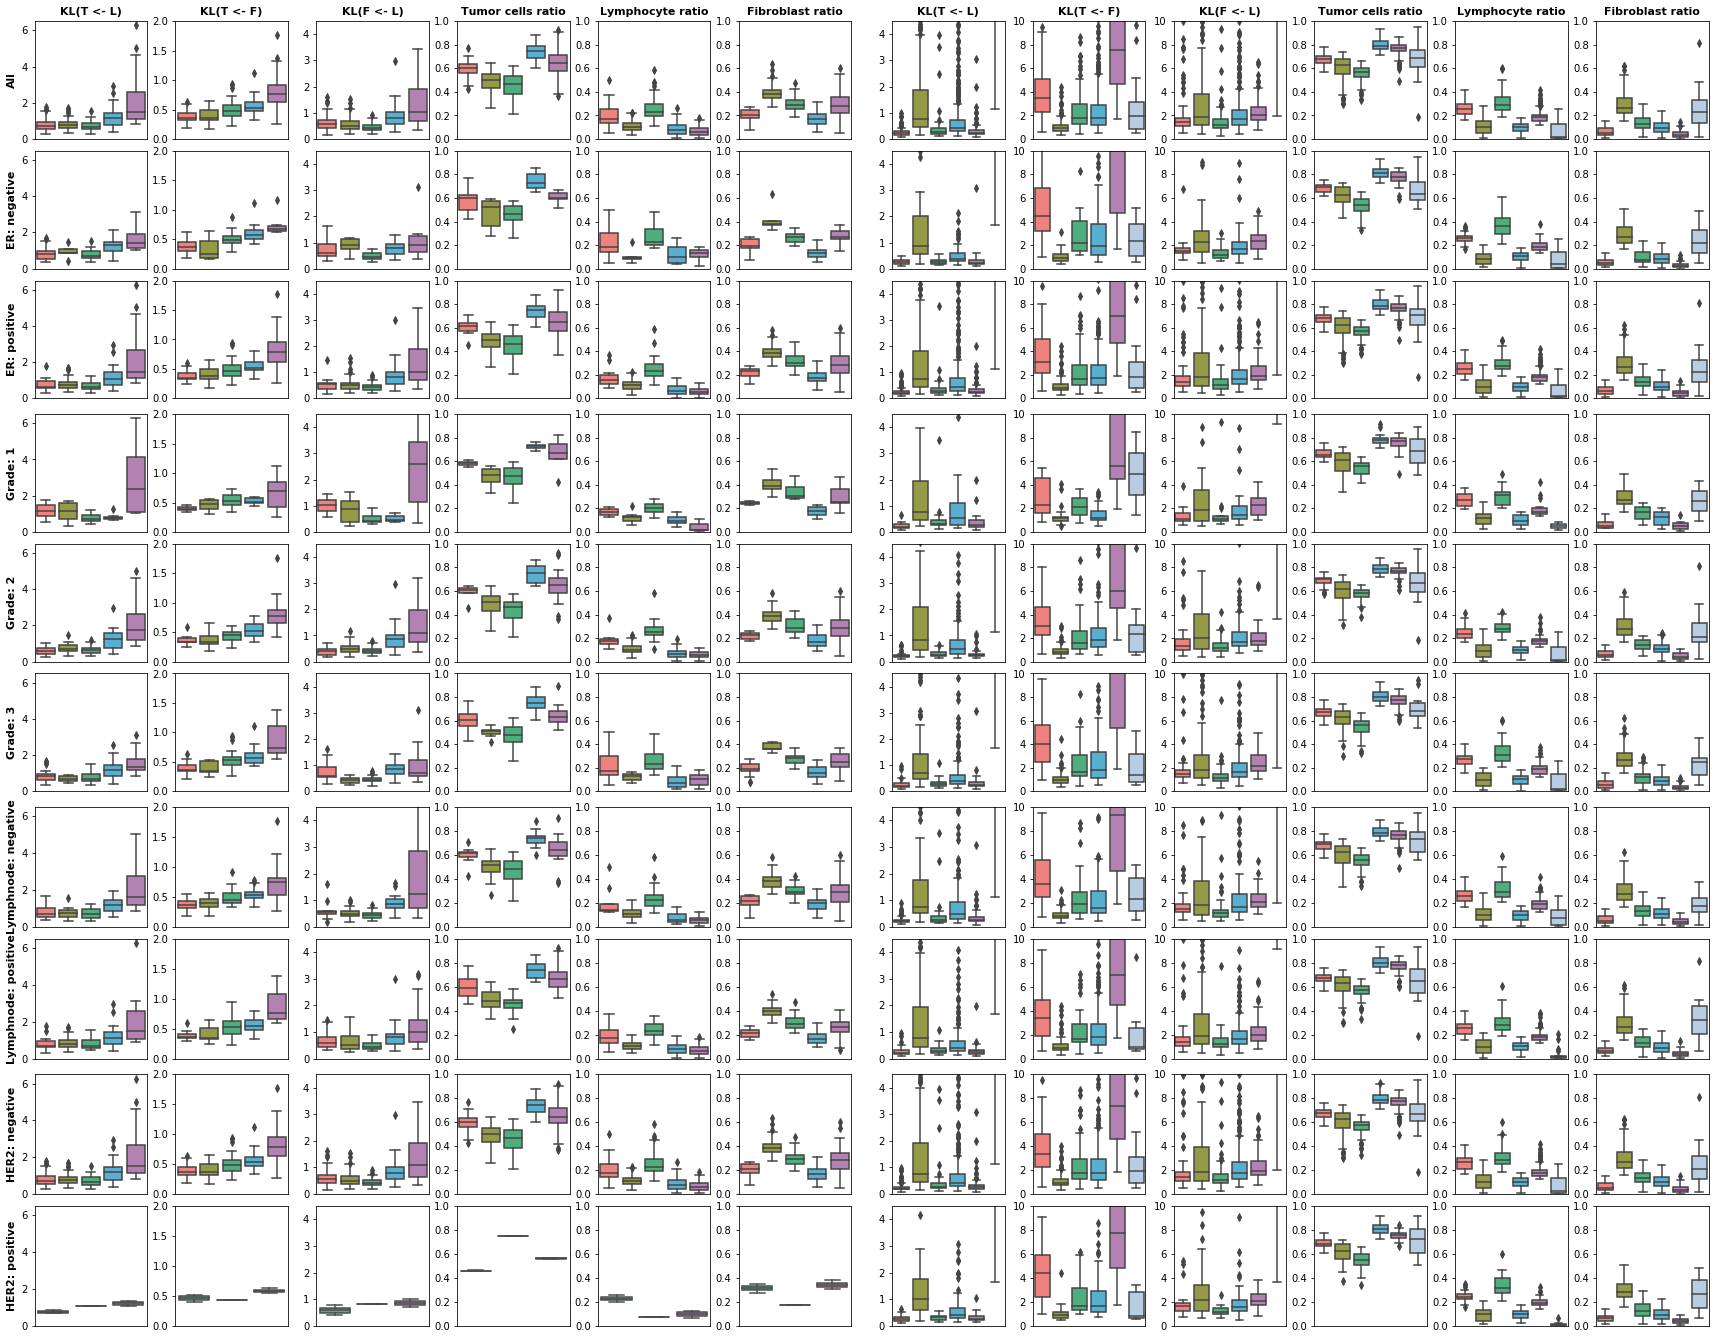

In [10]:
fig = plt.figure(figsize=(30, 24))#, constrained_layout=True)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set
fig.patch.set_facecolor('white')
nrows = len(variables_titles)
heights = [3, 3, 2, 2]
outer = gridspec.GridSpec(nrows, 2, wspace=0.05, hspace=0.05, height_ratios=heights)

for i, var in enumerate(variables_titles):
    boxplot_variable(fig, outer[i * 2], b, b_variables[i], variables_titles[i], b_ylims, all_first_row=i == 0, col_titles=i == 0)
    boxplot_variable(fig, outer[i * 2 + 1], m, m_variables[i], variables_titles[i], m_ylims, all_first_row=i == 0, col_titles=i == 0, row_titles=False)

plt.savefig('../figures/fig_boxplots.png', facecolor='w', format='png')
plt.show()